In [30]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from asi import (
    draw_multi_crosss,
    get_wavelengths,
    load_spectral_image,
    path_config,
)
from asi.draw import reconstruct_rgb_envi

root = path_config.measurements / "Session1"

# Spectral Scanner

In [31]:
spec_path = root / "Specim scanner/Color_checker_8_binning"

In [32]:
path = spec_path / "capture" / "solutions_scan_0110"
spectral_image, envi_header = load_spectral_image(path)
print(path)

/Users/hagayuya/Library/CloudStorage/GoogleDrive-haga.yuya2.2016@gmail.com/マイドライブ/ASI course 2024/group3/Session1/Specim scanner/Color_checker_8_binning/capture/solutions_scan_0110


In [ ]:
from pathlib import Path

path = Path('ASI course 2024/group3/Session1/Specim scanner/Color_checker_8_binning/capture/solutions_scan_0110')
spectral_image, envi_header = load_spectral_image(path)
plt.imshow(spectral_image[:, :, 100], cmap="gray")

FileNotFoundError: [Errno 2] No such file or directory: 'ASI course 2024/group3/Session1/Specim scanner/Color_checker_8_binning/capture/solutions_scan_0110.hdr'

Text(0.5, 0.98, 'RGB preview of spectral image by Spectral Scanner')

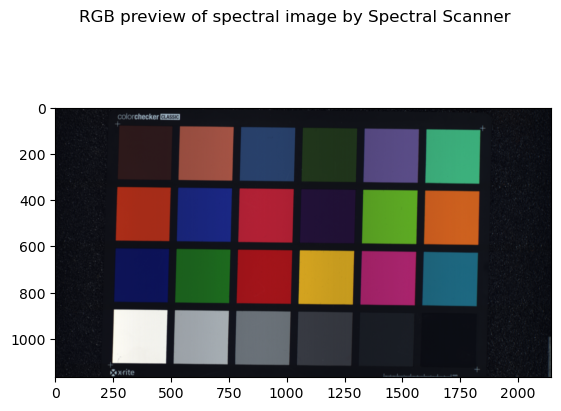

In [6]:
rgb_view = reconstruct_rgb_envi(spectral_image, envi_header)
plt.imshow(rgb_view)

plt.suptitle("RGB preview of spectral image by Spectral Scanner")

Text(0.5, 1.0, 'RGB view of spectral image')

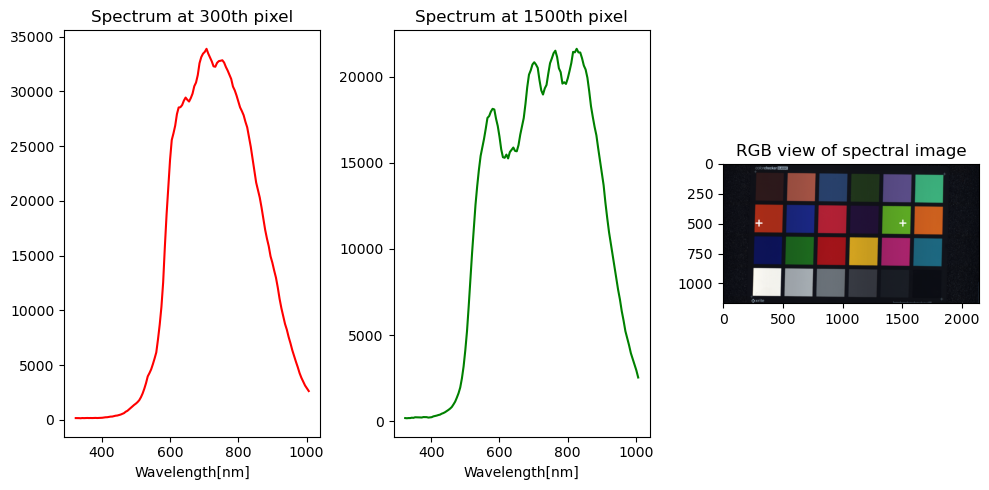

In [7]:
# Show spectra
colors = ["r", "g"]
positions = [(300, 500), (1500, 500)]
canvas = draw_multi_crosss(rgb_view, positions)

plt.rcParams["figure.dpi"] = 100
fig, axes = plt.subplots(1, 3, figsize=(10, 5), tight_layout=True)

wavelength = get_wavelengths(envi_header)
for pos, color, ax in zip(positions, colors, axes[:2]):
    ax.plot(wavelength, spectral_image[pos[1], pos[0], :], color=color)
    ax.set_title(f"Spectrum at {pos[0]}th pixel")
    ax.set_xlabel("Wavelength[nm]")

axes[2].imshow(canvas)
axes[2].set_title("RGB view of spectral image")

## Specium IQ

In [9]:
iq_path = root / "SpecimIQ" / "404" / "capture"

In [10]:
path = iq_path / "404"
spectral_image, envi_header = load_spectral_image(path)

Text(0.5, 0.98, 'Gray scale preview of spectral image by SpecimIQ')

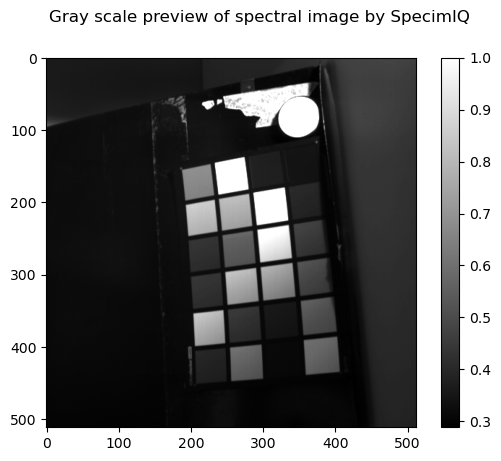

In [26]:
# Resolution
plt.rcParams["figure.dpi"] = 100
# show gray scale slice of 3D spectral image
gray_view = spectral_image[:, :, 100]
gray_view = gray_view.astype(float)
gray_view /= gray_view.max()
gray_view *= 3
gray_view = gray_view.clip(0, 1)
plt.imshow(gray_view, cmap="gray")
plt.colorbar()
plt.suptitle("Gray scale preview of spectral image by SpecimIQ")

Text(0.5, 0.98, 'RGB preview of spectral image by SpecimIQ')

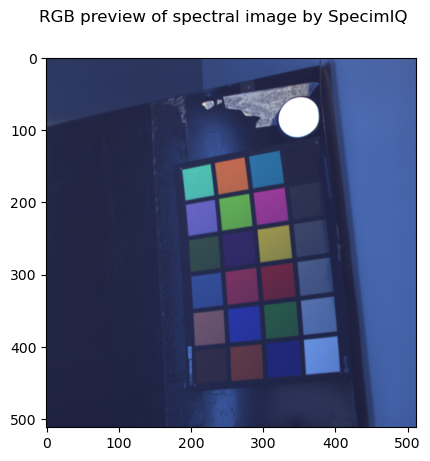

In [28]:
rgb_view = reconstruct_rgb_envi(spectral_image, envi_header)
rgb_view *= 1.5
rgb_view = rgb_view.clip(0, 1)
plt.imshow(rgb_view)
plt.suptitle("RGB preview of spectral image by SpecimIQ")

Text(0.5, 1.0, 'RGB view of spectral image')

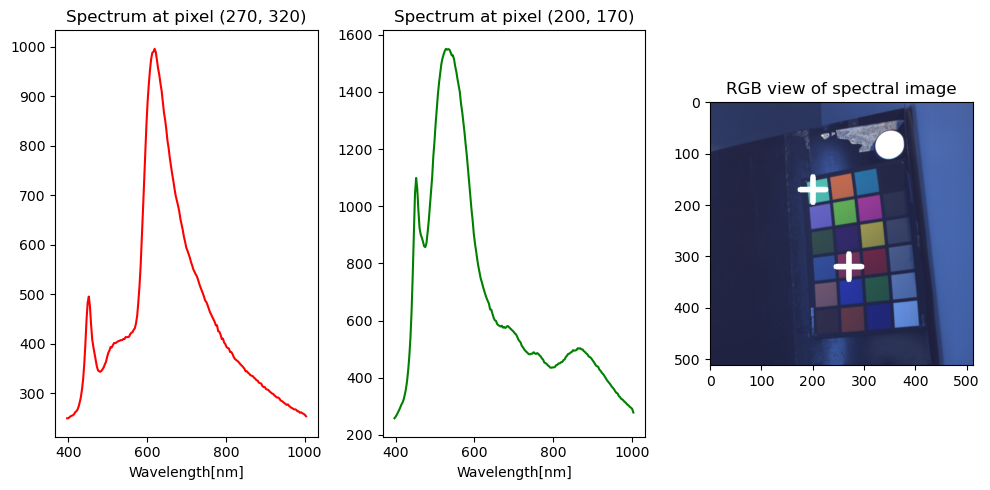

In [29]:
# Show spectra
colors = ["r", "g"]
positions = [(270, 320), (200, 170)]

canvas = draw_multi_crosss(rgb_view, positions)

plt.rcParams["figure.dpi"] = 100
fig, axes = plt.subplots(1, 3, figsize=(10, 5), tight_layout=True)

wavelength = get_wavelengths(envi_header)
for pos, color, ax in zip(positions, colors, axes[:2]):
    ax.plot(wavelength, spectral_image[pos[1], pos[0], :], color=color)
    ax.set_title(f"Spectrum at pixel {pos}")
    ax.set_xlabel("Wavelength[nm]")

axes[2].imshow(canvas)
axes[2].set_title("RGB view of spectral image")